# Matthew Joel
# Exploring the Star Wars Data Set
---

Let's take a look at the data set  `starwars` in the `dplyr` package.

In [1]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Homeworld Characters

---

I'm curious which homeworld is home to the most characters in this data set. How many characters are from this homeworld? Let's find out!



In [2]:
mc <- starwars %>%
  group_by(homeworld) %>%
  summarize(n_characters = n()) %>%
  arrange(desc(n_characters)) %>%
  head(1)
print(mc)

# A tibble: 1 × 2
  homeworld n_characters
  <chr>            <int>
1 Naboo               11


Aha, so the Naboo homeworld has the most characters at 11.  
<br>  


## Height of Characters
---

Let's create an empirical cumulative distribution function for the `height` variable in `starwars`.

Based on the plot, almost 20% characters in the data set are less than 150 cm. tall.


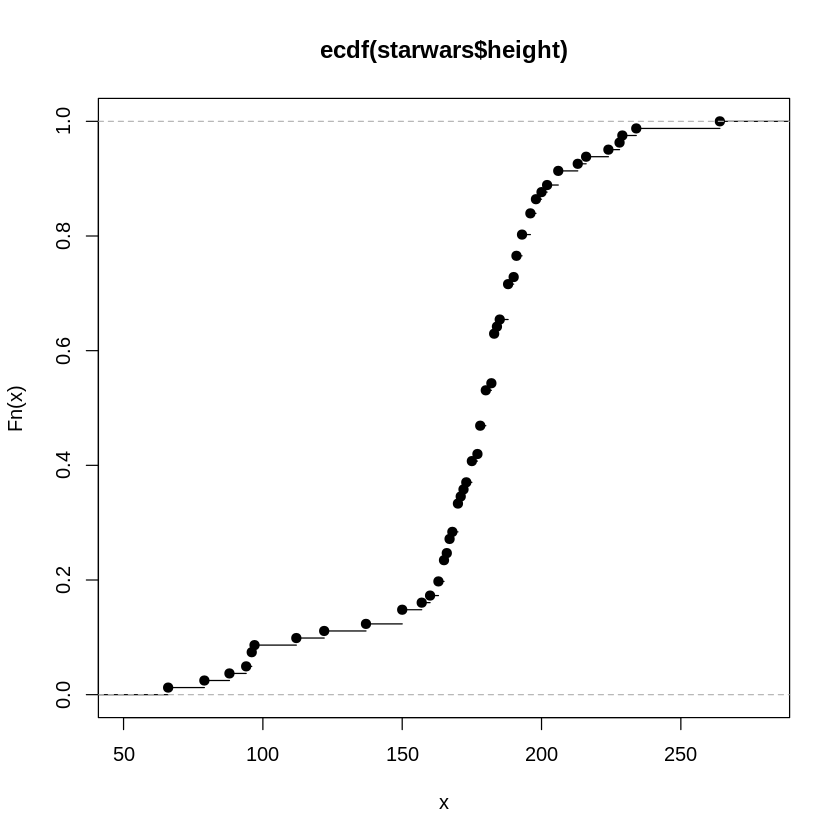

In [3]:
ecdf_height <- ecdf(starwars$height)

plot(ecdf_height)

Before we use the height variable anymore, lets remove the 6 missing height values coded as `NA`.
<br>


In [4]:
# save remaining heights to vector ht
ht <- na.omit(starwars$height)

## Filtering
Here's a filter of the `starwars` data frame to create a new data frame that includes only the characters with a homeworld of Naboo (and selects all variables).

In [5]:
naboo_data <- starwars %>%
  filter(homeworld == "Naboo")
head(naboo_data)

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>
R2-D2,96,32,NA,"white, blue",red,33,none,masculine,Naboo,Droid,"The Empire Strikes Back, Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens",,
Palpatine,170,75,grey,pale,yellow,82,male,masculine,Naboo,Human,"The Empire Strikes Back, Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi",,
Jar Jar Binks,196,66,none,orange,orange,52,male,masculine,Naboo,Gungan,"Attack of the Clones, The Phantom Menace",,
Roos Tarpals,224,82,none,grey,orange,NA,male,masculine,Naboo,Gungan,The Phantom Menace,,
Rugor Nass,206,NA,none,green,orange,NA,male,masculine,Naboo,Gungan,The Phantom Menace,,
Ric Olié,183,NA,brown,fair,blue,NA,NA,NA,Naboo,NA,The Phantom Menace,,Naboo Royal Starship


Let's do the same for the homeworld of Tatooine:

In [6]:
tat_data <- starwars %>%
  filter(homeworld == "Tatooine")
head(tat_data)

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>
Luke Skywalker,172,77,blond,fair,blue,19.0,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens","Snowspeeder , Imperial Speeder Bike","X-wing , Imperial shuttle"
C-3PO,167,75,NA,gold,yellow,112.0,none,masculine,Tatooine,Droid,"The Empire Strikes Back, Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , A New Hope",,
Darth Vader,202,136,none,white,yellow,41.9,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope",,TIE Advanced x1
Owen Lars,178,120,"brown, grey",light,blue,52.0,male,masculine,Tatooine,Human,"Attack of the Clones, Revenge of the Sith , A New Hope",,
Beru Whitesun lars,165,75,brown,light,blue,47.0,female,feminine,Tatooine,Human,"Attack of the Clones, Revenge of the Sith , A New Hope",,
R5-D4,97,32,NA,"white, red",red,NA,none,masculine,Tatooine,Droid,A New Hope,,


In [7]:
mean(naboo_data$height)
mean(tat_data$height)

[1] 175.4545

[1] 169.8

When we compare the two homeworlds, it appears that Naboo is taller on Average.  
<br>  


## Chart of Heights and Homeworlds

---

Let's create a single plot that contains two side-by-side boxplots to compare the distribution of heights for characters from Naboo compared to characters from Tatooine.


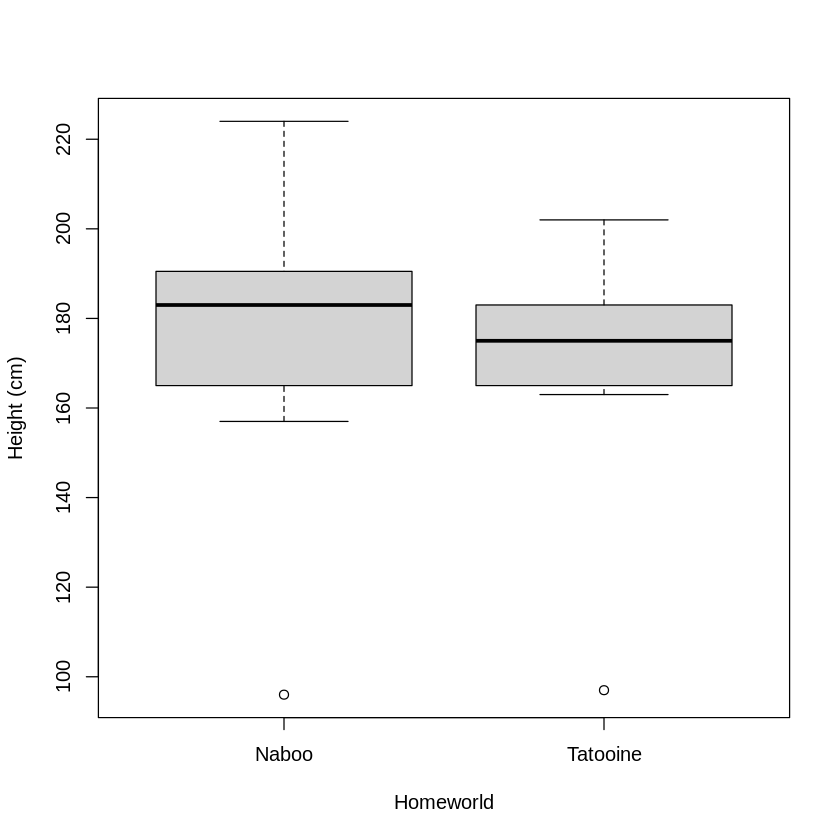

In [8]:
boxplot(naboo_data$height, tat_data$height,
        names = c("Naboo", "Tatooine"),
        xlab = "Homeworld",
        ylab = "Height (cm)")

## Outliers

---

From the boxplot, we can see that each homeworld appears to have an outlier in terms of height. Let's find out which character is the outlier in the Naboo boxplot and which character is the outlier in the Tatooine boxplot.

In [9]:
boxplot.stats(naboo_data$height)$out
out <- boxplot.stats(naboo_data$height)$out
out_ind <- which(naboo_data$height %in% c(out))
naboo_data[out_ind,]


boxplot.stats(tat_data$height)$out
out <- boxplot.stats(tat_data$height)$out
out_ind <- which(tat_data$height %in% c(out))
tat_data[out_ind,]

[1] 96

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>
R2-D2,96,32,NA,"white, blue",red,33,none,masculine,Naboo,Droid,"The Empire Strikes Back, Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens",,


[1] 97

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>
R5-D4,97,32,NA,"white, red",red,NA,none,masculine,Tatooine,Droid,A New Hope,,


Bingo! So the outlier from Naboo is R2D2 and from Tatooine is R5-D4.
<br>  
